# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://bit.ly/fish_csv_data')

#### 데이터를 features와 target으로 나누어봅시다(target은 Species)

In [ ]:
features = df.drop(['Species'],axis=1)
target = df['Species']

### StandardScaler를 통해 데이터의 표준화를 진행해주세요

In [ ]:
stand = StandardScaler()
f_std = pd.DataFrame(stand.fit_transform(features),columns=features.columns)

### 데이터의 분포를 확인한 후 예제로 사용하기 적합한 데이터 셋을 고르겠습니다

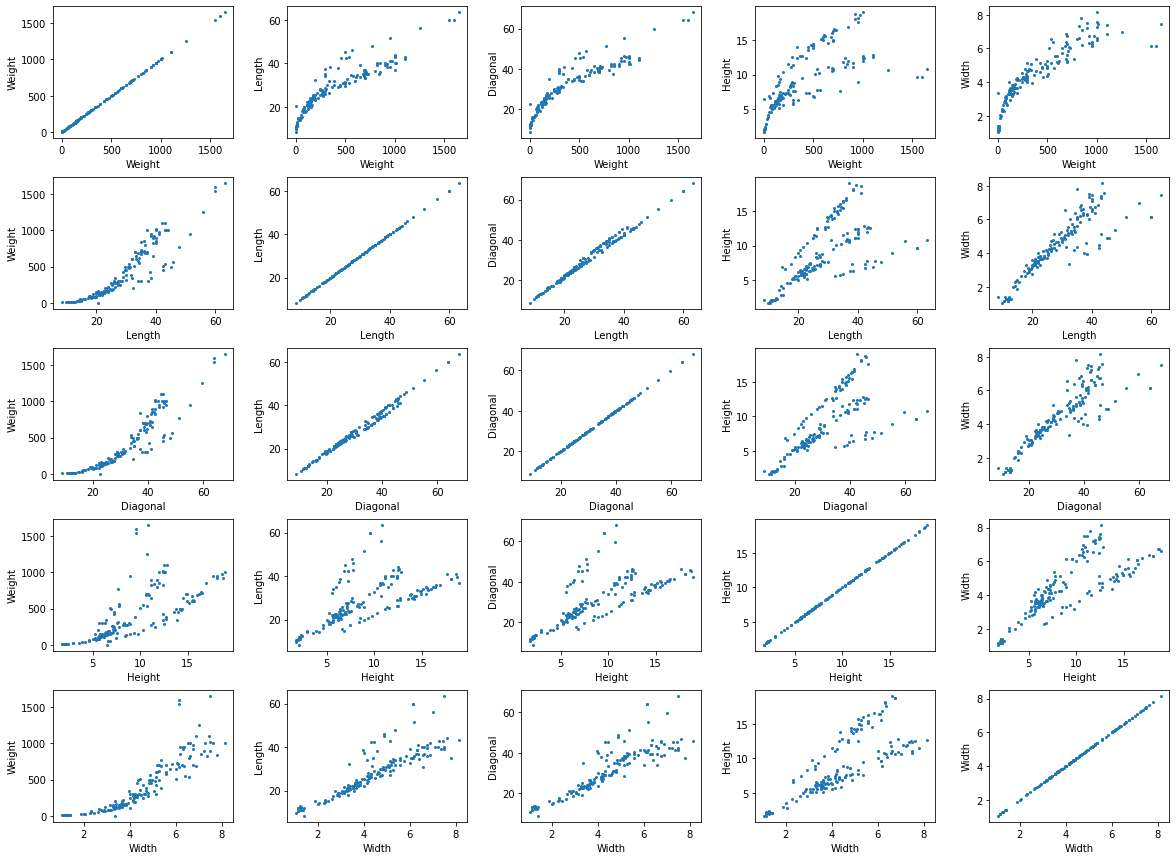

In [ ]:
f, axes = plt.subplots(5, 5)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

col_lis = list(f_std.columns)
for i in range(5):
  for j in range(5):
    axes[i,j].scatter(features[col_lis[i]],features[col_lis[j]],s = 4)
    axes[i,j].set_xlabel(col_lis[i])
    axes[i,j].set_ylabel(col_lis[j])

plt.show()

#### x = width, y = weight를 변수로하여 실습 진행하겠습니다
#### 너무 선형도 아니고, 데이터가 너무 분산되어 있지도 않아 실습에 이용하기 적당해 보이네요

# 회귀 파트

## 배치경사하강법(BGD)

#### 데이터를 훈련, 테스트 셋으로 나누어주세요(test_size = 0.1, random_state = 42)
#### 위에서 언급했듯, x = Width, y = Weight 입니다

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f_std['Width'], f_std['Weight'], test_size = 0.1, random_state = 42)

#### 배치경사하강법 실습 코드를 진행해보겠습니다. 
#### 직접 코드를 짜긴 너무 오래걸리니 아래에 빈칸을 채우는 식으로 진행해봅시다

In [ ]:
errors = []
ww = []
# random 한 값으로 w, b의 초기값을 설정합니다
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

x = x_train
y = y_train

#에포크()
num_epoch = 150
learning_rate = 0.1

for epoch in range(num_epoch):
    y_hat = x * w + b
    error = ((y_hat - y)**2).mean() #(빈칸)
    if error < 0.0005:
        break
    
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    ww.append(w)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print(epoch,'w:' ,round(w,5),'b:' ,round(b,5), 'error:',round(error,5))

 0 w = 0.23379, b = 0.67647 error = 1.31290
 5 w = 0.50171, b = 0.40303 error = 0.61262
10 w = 0.66132, b = 0.24008 error = 0.36403
15 w = 0.75641, b = 0.14299 error = 0.27577
20 w = 0.81306, b = 0.08513 error = 0.24444
25 w = 0.84680, b = 0.05065 error = 0.23332
30 w = 0.86691, b = 0.03010 error = 0.22937
35 w = 0.87888, b = 0.01786 error = 0.22797
40 w = 0.88602, b = 0.01057 error = 0.22747
45 w = 0.89027, b = 0.00622 error = 0.22730
50 w = 0.89280, b = 0.00363 error = 0.22724
55 w = 0.89431, b = 0.00208 error = 0.22721
60 w = 0.89521, b = 0.00116 error = 0.22721
65 w = 0.89575, b = 0.00062 error = 0.22720
70 w = 0.89606, b = 0.00029 error = 0.22720
75 w = 0.89625, b = 0.00010 error = 0.22720
80 w = 0.89637, b = -0.00002 error = 0.22720
85 w = 0.89644, b = -0.00009 error = 0.22720
90 w = 0.89648, b = -0.00013 error = 0.22720
95 w = 0.89650, b = -0.00016 error = 0.22720
100 w = 0.89651, b = -0.00017 error = 0.22720
105 w = 0.89652, b = -0.00018 error = 0.22720
110 w = 0.89653, b = -0.

#### 실습 결과 나타난 최적의 w, b 값을 이용하여 predict 데이터를 만드세요

In [ ]:
yy = w * x_test + b
y_pred = np.array(yy)

### y_test와 y_pred를 이용하여 MSE를 구해보세요

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.09806995237006692

#### w값에 따른 오차를 그래프를 통해 시각화 해보세요

Text(0, 0.5, 'error')

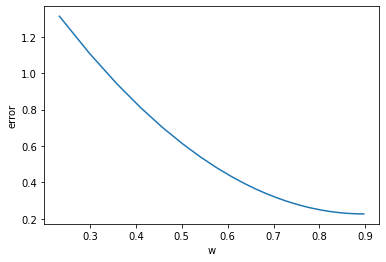

In [ ]:
plt.plot(ww,errors)
plt.xlabel('w')
plt.ylabel('error')

#### 경사하강법을 통해 구한 식을 plt.plot을 통한 직선, Width와 Weight의 분포는 plt.scatter로 같이 시각화 해봅시다

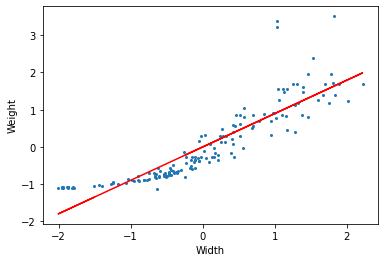

In [ ]:
plt.scatter(f_std['Width'],f_std['Weight'],s = 4)
plt.plot(f_std['Width'],w*np.array(f_std['Width']) + b,c = 'red')
plt.xlabel('Width')
plt.ylabel('Weight');

## 확률적 경사하강법(직접 구현보단 SGDRegressor라는 패키지를 사용합시다)

### SGDRegressor 패키지를 불러오고, 파라미터 세팅은 아래와 같이 진행해봅시다
### from sklearn.linear_model import SGDRegressor

#### shuffle = True
#### learning_rate = 'invscaling'
#### eta0 = 0.5
#### max_iter = 1000
#### penalty = None

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, penalty = None, learning_rate = 'invscaling',eta0 = 0.2)

#### 데이터를 훈련, 테스트 셋으로 나누어주세요(test_size = 0.1, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f_std['Width'], f_std['Weight'], test_size = 0.1, random_state = 42)

#### SGDRegressor에 데이터를 투입하기 위해선 데이터가 (-1,1) 형태의 넘파이 배열이여야 합니다
#### array([1],
####           [2],
####           [3])
#### x_train, y_train을 형태로 reshape 함수를 이용해 가공해주세요

In [ ]:
x = np.array(x_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)

#### 위에서 선언한 sgd_reg에 x와 y를 fit해주세요

In [ ]:
sgd_reg.fit(x,y)

print(sgd_reg.coef_)
print(sgd_reg.intercept_)

[0.90219896]
[-0.00292257]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 학습된 모델에 x_test를 통해 y_pred를 만들어주세요
#### (이때 투입될 x_test도 reshape(-1,1)해야 투입 가능합니다)

In [ ]:
y_pred = sgd_reg.predict(np.array(x_test).reshape(-1,1))

#### 마찬가지로 예측치와 y_test간의 mse를 산출해봅시다

In [ ]:
mean_squared_error(y_pred, y_test)

0.13542233780680785

## 미니배치 경사하강법

### 다시 한번 훈련, 테스트 데이터를 나눠볼게요(x = Width열, y = Weight열)
### test_size = 0.1, random_state = 42

In [ ]:
stand = StandardScaler()
f_std = pd.DataFrame(stand.fit_transform(features),columns=features.columns)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f_std['Width'], f_std['Weight'], test_size = 0.1, random_state = 42)

### 이번엔 4개의 훈련, 테스트 데이터 모두 np.array를 통해 넘파이 배열로 전환해주세요

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

#### 혹시 모르니 중간에 x_train, y_train, x_test, y_test의 shape을 확인해주고 갑시다. train은 143, test는 16이 나오면 맞습니다

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(143,)
(143,)
(16,)
(16,)


#### 미니배치 경사하강법 코드는 아래와 같습니다. 

#### 지금 구현하기엔 많이 어려우실 거라 판단하여 오늘 수업 내용, 그리고 아래 코드 참조해주시면 좋을 것 같습니다

In [ ]:
num_epoch=10
learning_rate=0.1
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)
ww = []
err = []

for epoch in range(num_epoch):
    print("epoch: ", epoch)
    print("-"*50)
    batch_size = 10
    batch_number = 100/10
    start = 0
    end = 10
    for iteration in range(int(batch_number)):
    
        #매 iteration마다 batch_size=10에 해당하는 데이터 셋을 가져옴
        x_batch = x_train[start: end]
        y_batch = y_train[start: end]
        
        start += 10
        end += 10

        # 선택한 batch의 예측값
        predict_batch = w*x_batch + b

        # 가중치 업데이트
        w = w - 2*learning_rate*((predict_batch - y_batch)*x_batch).mean()
        b = b - 2*learning_rate * (predict_batch - y_batch).mean()

        #error값은 전체 데이터셋의 오류값을 계산해야한다.
        predict = w*x + b
        error = ((y - predict)**2).mean()

        print("iteration ", iteration, "w =", w, "b= ",b, 'error= ', error)
        ww.append(w)
        err.append(error)

    if error < 0.000001:
            break
print("최종: ","w= ", w, "b= ", b, "error= ", error)

epoch:  0
--------------------------------------------------
iteration  0 w = 0.7705234994816939 b=  -0.6487445805119408 error=  0.6664601345815773
iteration  1 w = 0.7458480163262337 b=  -0.5504340700762638 error=  0.5554816557742072
iteration  2 w = 0.6872960706482567 b=  -0.4494039768683067 error=  0.47597762533216115
iteration  3 w = 0.7281867427646097 b=  -0.36461837300621974 error=  0.39043988840782706
iteration  4 w = 0.756660591413242 b=  -0.2902541059270592 error=  0.33228573992592825
iteration  5 w = 0.7350877090213374 b=  -0.2772347570944861 error=  0.3315498599100329
iteration  6 w = 0.7319664449931742 b=  -0.21303253454183987 error=  0.3007916786074236
iteration  7 w = 0.7715112022459973 b=  -0.15745208116349385 error=  0.26824052468431486
iteration  8 w = 0.7912275208072689 b=  -0.13680567613008676 error=  0.25744950813836365
iteration  9 w = 0.8179951868169324 b=  -0.13199728248129655 error=  0.25109654397935594
epoch:  1
-------------------------------------------------

### 위에서 얻은 최종 w와 b값을 통해 y_pred를 넘파이 배열로 만들어 볼게요

In [ ]:
yy = w * x_test + b
y_pred = np.array(yy)

### y_test와 y_pred를 이용해 mse를 구해봅시다

In [ ]:
mean_squared_error(y_pred,y_test)

0.14555618653015243

#### w값에 따른 오차를 그래프를 통해 시각화 해보세요

Text(0, 0.5, 'error')

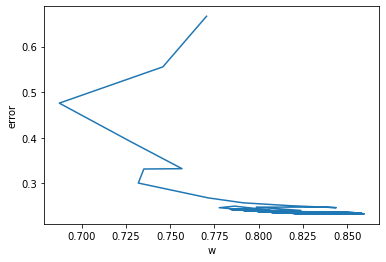

In [ ]:
plt.plot(ww,err)
plt.xlabel('w')
plt.ylabel('error')

#### 경사하강법을 통해 구한 식을 plt.plot을 통한 직선, Width와 Weight의 분포는 plt.scatter로 같이 시각화 해봅시다

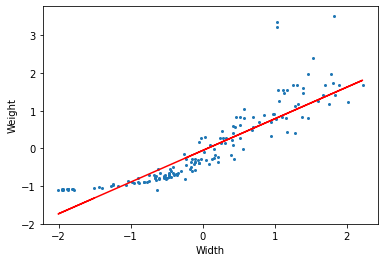

In [ ]:
plt.scatter(f_std['Width'],f_std['Weight'],s = 4)
plt.plot(f_std['Width'],w*np.array(f_std['Width']) + b,c = 'red')
plt.xlabel('Width')
plt.ylabel('Weight');

# 분류

## SGDclassifier

#### SGD classifier에 넣을 데이터를 가공해봅시다. df의 species열을 target이란 변수에 저장합니다

In [ ]:
target = df['Species']
features = df.drop(['Species'],axis=1)

#### target의 7개 종류의 object를 0~6의 숫자로 대체하여 target_c라는 변수에 저장합시다

In [ ]:
target_c = target.map({'Bream':0, 'Roach':1, 'Whitefish':2,'Parkki':3,'Perch':4,'Pike':5,'Smelt':6})

#### 위에서 표준화한 features인 f_std, 그리고 target_c를 훈련, 테스트 데이터로 분할합시다(test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f_std, target_c, test_size = 0.3, randmo_state = 42)

#### 훈련 데이터 셋을 SGDClassifier로 학습 시키고 훈련데이터로 점수를 확인해봅시다
#### SGDClassifier의 파라미터에 loss = 'log', max_iter = 100으로 지정해볼게요

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 10)
sc.fit(x_train, y_train)

print(sc.score(x_train, y_train))

0.8288288288288288


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
sc.score(x_test, y_test)

0.9166666666666666

## Cross-entropy

#### Cross-entropy 함수가 어떤 식으로 분류 모델의 성능을 측정하는지 맥락을 알아보겠습니다.

In [ ]:
import numpy as np
answer = np.array([1,0,0,1,1,1,0])
predic = np.array([0.9,0.1,0.2,0.8,0.9,0.8,0.2])

def cross_entropy(pred, target):
    # 교차 엔트로피 합
    delta = 1e-7        # log 0을 계산할 수 없으므로, 아주 작은 값을 넣음
    return -np.sum(target * np.log(pred + delta))

cross_entropy(predic, answer)


0.657007661721878

#### 위 데이터의 answer와 predict값은 거의 차이가 없도록 설정하였기에 cross-entropy 점수가 작게 나왔습니다. 이번엔 answer와 predict값이 큰 차이가 나도록 설정하겠습니다.

In [ ]:
answer = np.array([1,0,0,1,1,1,0])
pred = np.array([0.1,0.8,0.8,0.2,0.3,0.2,0.7])

print(cross_entropy(pred, answer))

6.725431388855655


#### 확실히 점수가 큰 것을 알 수 있습니다.
#### 다음으론 logistic 회귀 모델의 성능을 cross-entropy를 통해 평가해보겠습니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

#### df데이터에서 Species가 Bream이거나 Roach인 행들만 불러와서 변수에 저장해주세요 

In [ ]:
df_sel = df[(df['Species'] == 'Bream')|(df['Species'] == 'Roach')]

#### 위에서 추출한 데이터 프레임을 features, target으로 나누고 target은 0과 1로 인코딩 해주세요

In [ ]:
target = df_sel['Species']
features = df_sel.drop(['Species'],axis=1)
target_c = target.map({'Bream':0, 'Roach':1})

#### features는 표준화 작업 진행해주세요

In [ ]:
stand = StandardScaler()
f_std = pd.DataFrame(stand.fit_transform(features),columns=features.columns)

#### 훈련, 테스트 셋으로 데이터를 분할해주세요(test_size = 0.3, random_state = 42)
#### 그리고 위에서 지정한 lg(LogisticRegression)에 훈련 세트를 학습 시킵시다

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f_std, target_c, test_size = 0.3, random_state = 42)
lg.fit(x_train, y_train)

#### 저번 시간에 배운 로지스틱 회귀의 시그모이드 함수를 sigmoid라는 이름의 함수로 선언해봅시다

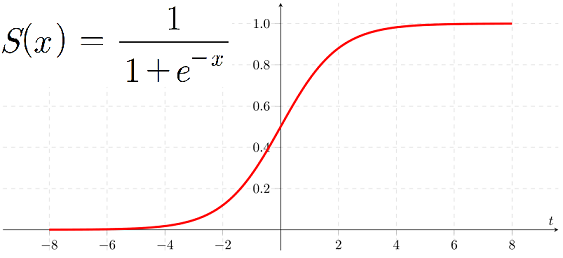

In [ ]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

#### sigmoid(x) 함수를 선언하였다면 아래의 코드를 실행시켜봅시다
#### 아래 코드는 학습된 로지스틱 모델의 계수와 절편값을 이용해 테스트 데이터를 이용해 predict값을 예측하는 코드입니다

In [ ]:
pred = []
for i in (np.array(x_test).dot(lg.coef_.T)+ lg.intercept_[0]).reshape(-1):
  pred.append(sigmoid(i))
pred = np.array(pred)

In [ ]:
def cross_entropy(pred, target):
    # 교차 엔트로피 합
    delta = 1e-7        # log 0을 계산할 수 없으므로, 아주 작은 값을 넣음
    return -np.sum(target * np.log(pred + delta))

cross_entropy(pred, np.array(y_test))

0.08642963852457278

#### Cross-entropy 기반의 경사하강법을 이용해 로지스틱 모델의 계수와 절편을 결정하는 코드는 난이도가 너무 높아 구현하지 못하였습니다 ㅠㅠ